<a href="https://colab.research.google.com/github/PrathamUdayG/Machine_Learning_Algorithms_Project/blob/main/Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**House Price Prediction**

In [65]:
import pandas as pd
import numpy as np

In [66]:
pd.set_option('display.max_columns',None)

In [67]:
df = pd.read_csv("/content/house_price_regression_dataset.csv")

In [68]:
df.head(20)

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
5,3944,5,3,1990,2.475930,2,8,8.797970e+05
6,3671,1,2,2012,4.911960,0,1,8.144279e+05
7,3419,1,1,1972,2.805281,1,1,7.034131e+05
8,630,3,3,1997,1.014286,1,8,1.738750e+05
9,2185,4,2,1981,3.941604,2,5,5.041765e+05


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [70]:
df.shape

(1000, 8)

In [71]:
# TO CHECK OUTLIERS
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1-1.5*IQR
  upper_bound = Q3+1.5*IQR
  outliers = df[(df[col]<lower_bound)|(df[col]>upper_bound)]
  print(f"Outliers in{col}:{len(outliers)}_outliers")

Outliers inSquare_Footage:0_outliers
Outliers inNum_Bedrooms:0_outliers
Outliers inNum_Bathrooms:0_outliers
Outliers inYear_Built:0_outliers
Outliers inLot_Size:0_outliers
Outliers inGarage_Size:0_outliers
Outliers inNeighborhood_Quality:0_outliers
Outliers inHouse_Price:0_outliers


In [72]:
df.isnull().sum()

,0
Square_Footage,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Lot_Size,0
Garage_Size,0
Neighborhood_Quality,0
House_Price,0


In [73]:
df.skew()

,0
Square_Footage,-0.066001
Num_Bedrooms,0.025884
Num_Bathrooms,0.049917
Year_Built,-0.021254
Lot_Size,-0.044288
Garage_Size,-0.040400
Neighborhood_Quality,-0.020445
House_Price,-0.063955


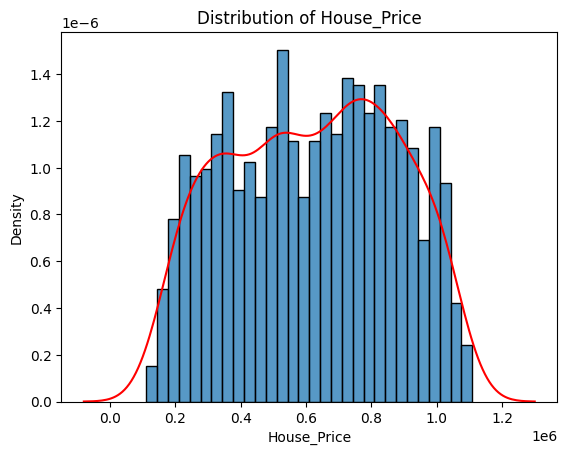

In [74]:
sns.histplot(df[col], bins=30, stat="density")
sns.kdeplot(df[col], color="red")
plt.title(f"Distribution of {col}")
plt.show()

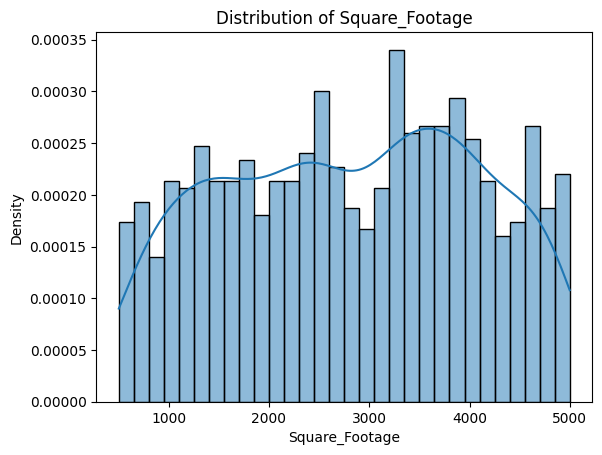

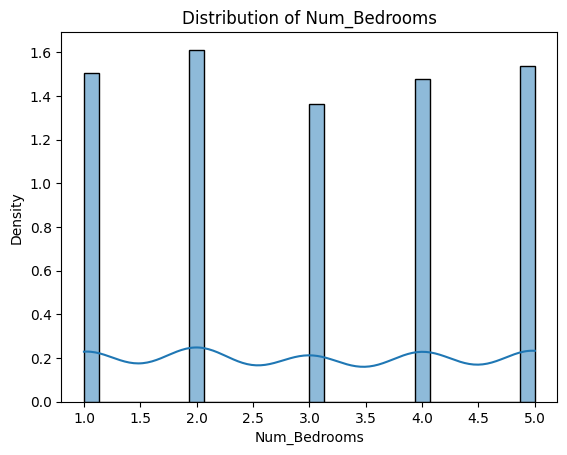

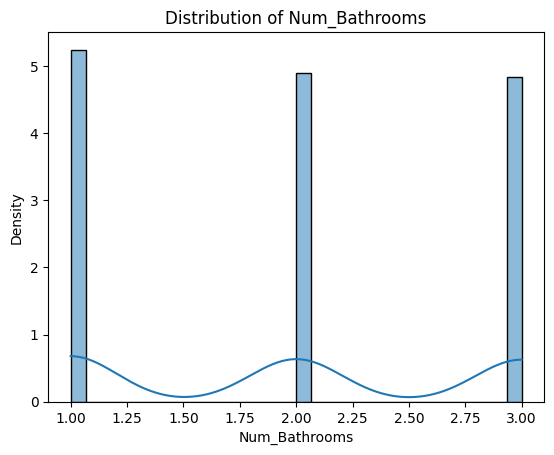

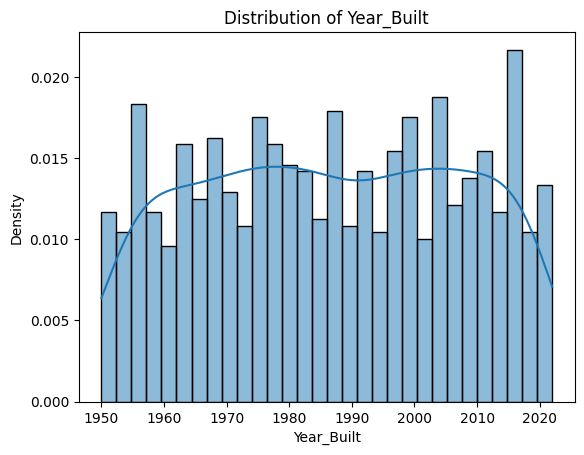

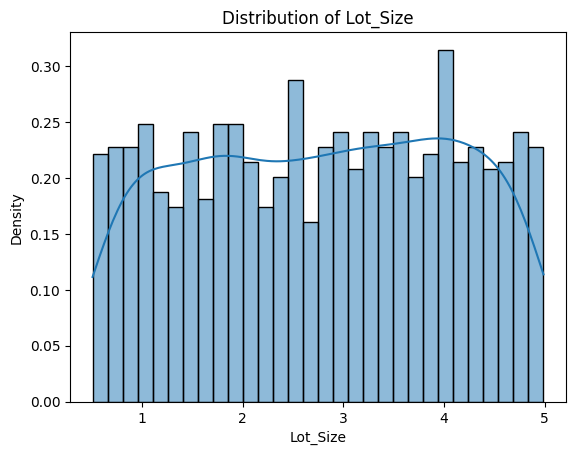

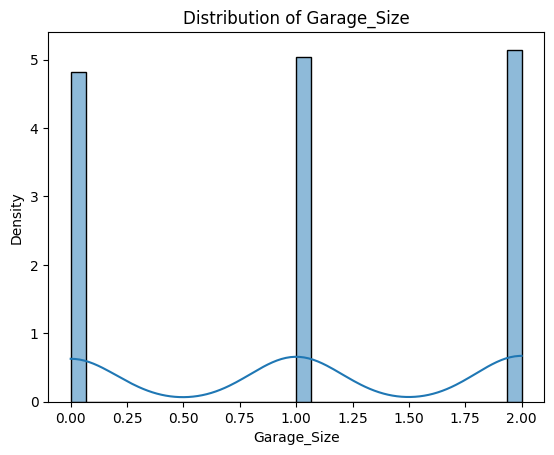

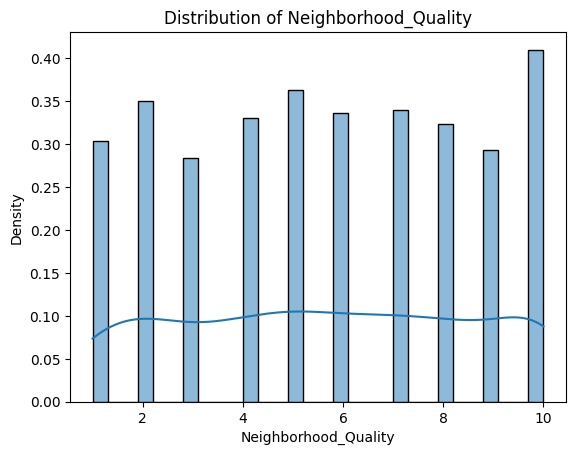

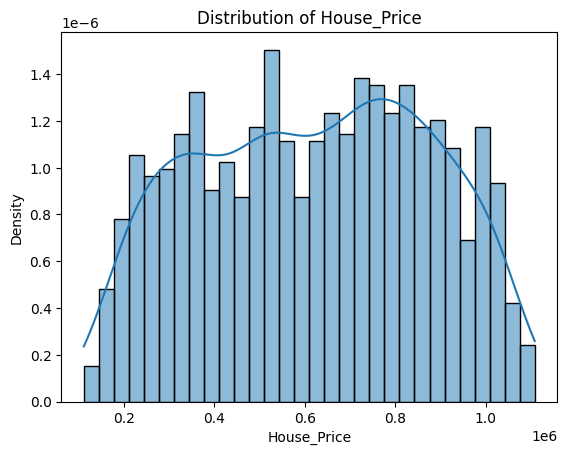

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    sns.histplot(df[col], bins=30, stat="density", kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

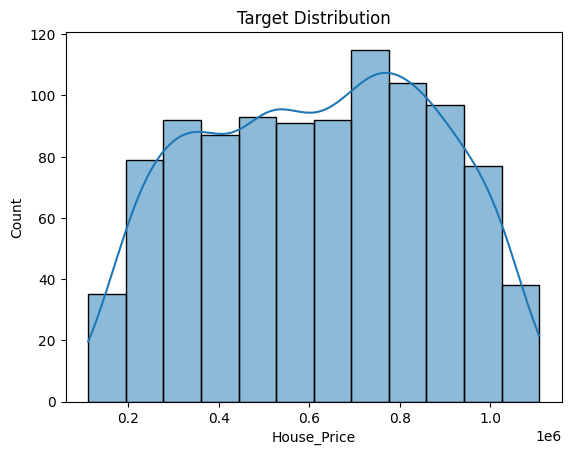

In [76]:
sns.histplot(df['House_Price'], kde=True)
plt.title("Target Distribution")
plt.show()

In [77]:
X = df.drop('House_Price', axis=1)
y = df['House_Price']

In [78]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [79]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(
    loss='huber',          # robust to outliers
    learning_rate=0.05,    # controlled learning
    n_estimators = 500,    # sufficient boosting rounds
    max_depth = 3,         # shallow trees (controls overfitting)
    subsample = 0.8,       # stochastic gradient boosting
    random_state = 42
)

In [80]:
from sklearn.metrics import mean_squared_error
gbr.fit(X_train, y_train)
preds = gbr.predict(X_test)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 13169.510581143631


In [81]:
train_preds = gbr.predict(X_train)

train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
test_rmse  = np.sqrt(mean_squared_error(y_test, preds))

print("Train RMSE:", train_rmse)
print("Test RMSE :", test_rmse)

Train RMSE: 6296.400982225088
Test RMSE : 13169.510581143631


In [82]:
from sklearn.model_selection import train_test_split

# First split: train+val vs test
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Second split: train vs validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42
)

In [83]:
# Monitor validation error and stop early
from sklearn.metrics import mean_squared_error
import numpy as np

val_errors = []

for y_pred in gbr.staged_predict(X_val):
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    val_errors.append(rmse)

best_n_estimators = np.argmin(val_errors) + 1
print("Best n_estimators:", best_n_estimators)


Best n_estimators: 500


In [84]:
# Retrain model with optimal trees
gbr_final = GradientBoostingRegressor(
    loss="huber",
    learning_rate=0.05,
    n_estimators=best_n_estimators,
    max_depth=3,
    subsample=0.8,
    random_state=42
)

gbr_final.fit(X_train_full, y_train_full)

GradientBoostingRegressor(learning_rate=0.05, loss='huber',
                          n_estimators=np.int64(500), random_state=42,
                          subsample=0.8)

In [85]:
test_preds = gbr_final.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))

print("Final Test RMSE:", test_rmse)

Final Test RMSE: 13169.510581143631


In [86]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, preds)
print("R² Score:", r2)

R² Score: 0.9973093533334777


In [88]:
from sklearn.metrics import r2_score

# Predictions
train_preds = gbr_final.predict(X_train)
val_preds   = gbr_final.predict(X_val)

# R² scores
train_r2 = r2_score(y_train, train_preds)
val_r2   = r2_score(y_val, val_preds)

print("Train R²:", train_r2)
print("Val   R²:", val_r2)

Train R²: 0.999354458821871
Val   R²: 0.9994493327837211
